# Network models - Stochastic Networks using Markov Chain #
Here we use a network model called the Boltzmann machine, for which the input-output relationship is stochastic. 

In the Boltzmann machine, the neurons are treated as binary, so v_a(t) = 1 if unit a is avtive at time t, e.g. it fires a spike between times t and t + dt.
v_a(t) = 0 is an inactive neuron. 
The state of unit a is determined by its total input current:

I_a(t) = h_a(t) + sum_1^Nv M_aa' v_a'(t).

Units are permitted to change state only at integral multiples of dt. At each time step, a single unit is selected, usually at random, to be updated. 
This update is based on a probabilistic rather than a deterministic rule. If unit a is selected, its state at the next time step is set 
stochastically to 1 with probability

P[v_a(t+dt) = 1] = F(I_a(t)), with F(I_a) = 1/(1+exp(-I_a))

F is a sigmoidal function, which has the property that the larger the value of I_a, the more likely unit a is to take the value 1. 

The state of activity of the network evolves as a Markov chain. This means that the components of v at different times are sequences of 
random variables with the property that v(t+dt) depends only on v(t), and **not on the previous history of the network**. This is known as Glauber dynamics.
THe Glauber dynamics (statistical mechanics) is used to determine the equilibrium distribution of activities. Under Glauber dynamics, v does not 
converge to a fixed point, but can be described by a probability distribution associated with an energy function 

### Resource ###
Theoretical Neuroscience, Dayan & Abbott: Chapter 7.6 Stochastic Networks

In [3]:
import numpy as np
import matplotlib.pyplot as plt

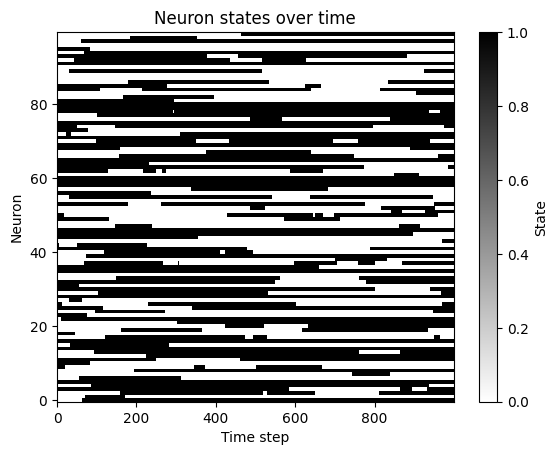

In [4]:
# This script initializes a network of neurons with random states and runs a simulation over a number of time steps. 
# At each time step, it selects a neuron at random and updates its state based on the total input current to the 
# neuron and a probabilistic rule. The state of each neuron at each time step is stored and plotted at the end.
num_neurons = 100  # Number of neurons
num_time_steps = 1000  # Number of time steps
dt = 0.01  # Time step size
M = np.random.normal(0, 1, (num_neurons, num_neurons))  # Interaction matrix
h = np.random.normal(0, 1, num_neurons)  # External field

# Initialize the state of the neurons
v = np.random.randint(0, 2, num_neurons)

# Initialize an array to store the state of the neurons over time
states = np.zeros((num_neurons, num_time_steps))

# Run the simulation
for t in range(num_time_steps):
    # Store the current state of the neurons
    states[:, t] = v

    # Select a neuron to update
    a = np.random.randint(num_neurons)

    # Calculate the total input current to the neuron
    I_a = h[a] + M[a, :].dot(v)

    # Update the state of the neuron based on a probabilistic rule
    v[a] = np.random.rand() < 1 / (1 + np.exp(-I_a))

# Plot the state of the neurons over time
plt.imshow(states, aspect='auto', cmap='binary', interpolation='none', origin='lower')
plt.xlabel('Time step')
plt.ylabel('Neuron')
plt.title('Neuron states over time')
plt.colorbar(label='State')
plt.show()